# Women's E-Commerce Clothing Reviews

In [104]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Context

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

## Content

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.

Age: Positive Integer variable of the reviewers age.

Title: String variable for the title of the review.

Review Text: String variable for the review body.

Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.

Division Name: Categorical name of the product high level division.

Department Name: Categorical name of the product department name.

Class Name: Categorical name of the product class name.


## We look forward for exciting analysis in PPT form which will help the business manager gain insights from the customer reviews, for example –
   
    -   most sought after features by women in the apparels,
    
    -   drivers for recommending the product to other,
    
    -   extract topic or concept based features from reviews 
    
    -   Deep dive on the features by age group, product group/class

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


import random
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams

from collections import Counter

# Warnings
import warnings
warnings.filterwarnings('ignore')

/home/sayali/anaconda3/lib/python3.5/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [41]:
data = pd.read_csv('./Womens Clothing E-Commerce Reviews.csv', header=0, index_col=0)
#data = pd.read_csv('WomensClothingE-CommerceReviews.csv', header=0, index_col=0)

In [42]:
data.head(1)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates


In [43]:
print('size of data is - (rows,col)', data.shape)

size of data is - (rows,col) (23486, 10)


In [44]:
print('Data Types of columns - ')
data.dtypes

Data Types of columns - 


Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [46]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [47]:
data.describe(include = ['O'])

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


It seems there are missing values in Title and Review Text

DivisionName, DepartmenrName and ClassName NA values can be discarted. 

In [49]:
for i in ["Division Name","Department Name","Class Name","Review Text"]:
    data = data[data[i].notnull()]
data.shape

(22628, 10)

Get Unique value count for each column

In [50]:
unique_count = []
for i in data.columns:
    unique_count.append([i,len(data[i].unique()),data[i].isnull().sum()])

Verify If any missing value still exists

In [51]:
data.describe(include = ['O'])

,Title,Review Text,Division Name,Department Name,Class Name
count,19662,22628,22628,22628,22628
unique,13983,22621,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13365,10048,6145


In [52]:
print("Missing Values: {}".format(data.isnull().sum().sum()))

Missing Values: 2966


There are still some missing values in title.



#### Calculate no of words in each review

In [54]:
data["Word Count"] = data['Review Text'].str.split().apply(len)

#### Calculate no of words in each review

In [55]:
data["Character Count"] = data['Review Text'].apply(len)

#### Identify if review is positive or Negative

In [56]:
#data['Rating'] = data.Rating.astype('number')
#data['Rating'] = pd.to_numeric(data.Rating, errors='coerce')
#data['Recommended IND'] = pd.to_numeric(data.RecommendedIND, errors='coerce')
#data['Positive Feedback Count'] = pd.to_numeric(data.PositiveFeedbackCount, errors='coerce')
data["Label"] = 0
data.loc[data.Rating >= 3,["Label"]] = 1

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Clothing ID,22628.0,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,22628.0,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,22628.0,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,22628.0,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,22628.0,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Word Count,22628.0,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0
Character Count,22628.0,308.761534,143.934126,9.0,186.0,302.0,459.0,508.0
Label,22628.0,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0


### How many unique values

In [58]:
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Column,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Unique,1172,77,13984,22621,5,2,82,3,6,20
Missing,0,0,2966,0,0,0,0,0,0,0


In [60]:
data[["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,13983,Love it!,136
Division Name,3,General,13365
Department Name,6,Tops,10048
Class Name,20,Dresses,6145


## -   most sought after features by women in the apparels,

In [75]:
def percentstandardize_barplot(x,y,hue, data, ax=None, order= None):
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

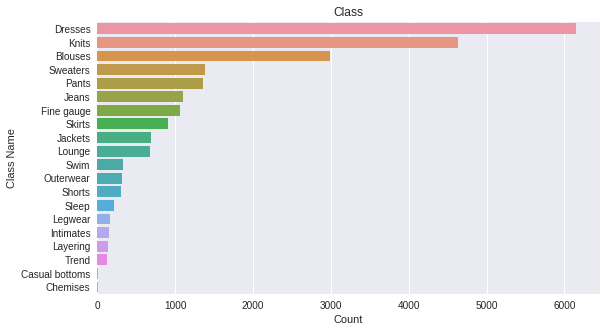

In [78]:
plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=data,order=data["Class Name"].value_counts().index)
plt.title("Class")
plt.xlabel("Count")
plt.show()

## Dresses, IKnits, Blouses are most seek items by women

## -   drivers for recommending the product to other,

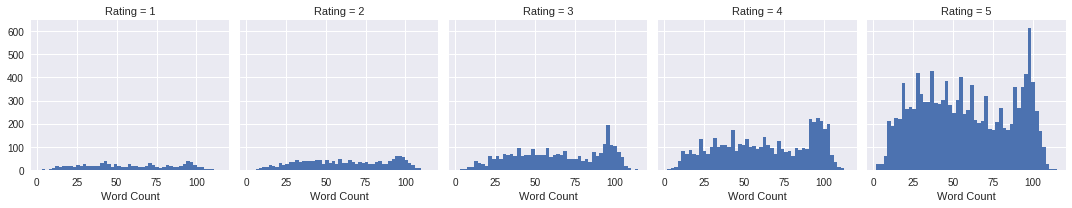

In [83]:
g = sns.FacetGrid(data=data, col='Rating')
g.map(plt.hist, 'Word Count', bins=50)

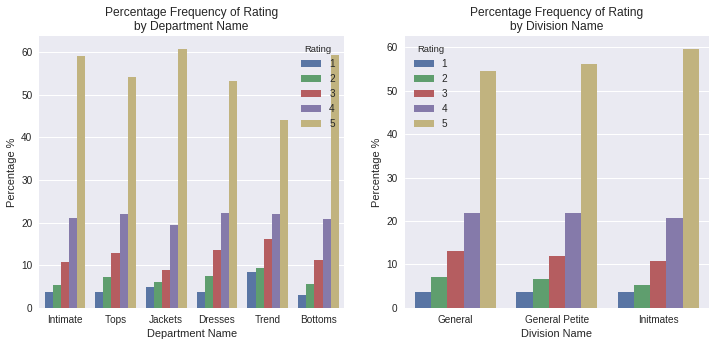

In [80]:
xvar = ["Department Name","Division Name"]
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
percentstandardize_barplot(x=xvar[0],y="Percentage", hue=huevar,data=data, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[0]))
axes[0].set_ylabel("Percentage %")
percentstandardize_barplot(x=xvar[1],y="Percentage", hue="Rating",data=data, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[1]))
plt.show()

## We can recommand Higly positively rated products to other users. It seems 5 rated products have longer review comments

In [102]:
pd.set_option('max_colwidth', 500)
data[["Title","Review Text", "Rating"]].sample(1)

,Title,Review Text,Rating
5155,A flattering over-sized shirt,"I generally wear a small or medium in tops, and decided to get the medium/large. it's over-sized, but it lays very nicely and doesn't look ""frumpy"". the back of the shirt is exactly as it looks in the picture. the front of the shirt is more of a solid blue than is shown, but still lovely.",5


### Text Preprocessing

In [69]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') 
    words = tokenizer.tokenize(txt) 
    words = [w for w in words if not w in stop_words] 
    words = [ps.stem(w) for w in words] 
    return words

In [71]:
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurrence"]
        out = pd.concat([out, table], axis=1)
    return out

In [72]:
print("Recommended Items")
gram_table(data= data['Review Text'][data["Recommended IND"].astype(int) == 1], gram=[1,2,3,4,5], length=30)

Recommended Items


,1-Gram,Occurrence,2-Gram,Occurrence,3-Gram,Occurrence,4-Gram,Occurrence,5-Gram,Occurrence
0,dress,10055,true size,1246,fit true size,460,compliment everi time wear,50,34b 26 waist 36 hip,27
1,love,9914,fit perfectli,1038,run true size,195,look great skinni jean,32,get compliment everi time wear,25
2,fit,9794,look great,907,receiv mani compliment,170,26 waist 36 hip,32,5 2 current 33 25,17
3,size,9125,love dress,792,love love love,139,34b 26 waist 36,28,115 lb 30 dd 26,15
4,wear,7042,look like,676,small fit perfectli,138,get compliment everi time,27,lb 30 dd 26 5,13
5,look,6940,5 4,622,fit like glove,130,dress fit true size,23,2 current 33 25 37,13
6,top,6662,love top,602,usual wear size,109,5 4 120 lb,22,115 lb 30dd 26 5,13
7,color,6238,usual wear,592,order usual size,93,115 lb 30 dd,22,5 1 5 115 lb,12
8,like,5916,fit well,571,run littl big,89,love love love dress,22,5 2 34b 26 waist,12
9,great,5584,usual size,558,look great jean,88,usual wear size 4,21,lb 30dd 26 5 waist,12


##   Deep dive on the features by age group, product group/class

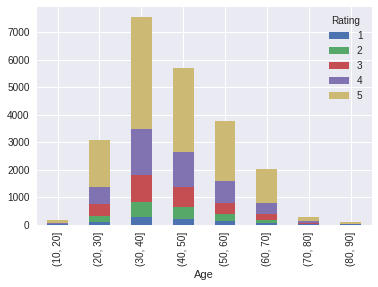

In [85]:
data.groupby(['Rating', pd.cut(data['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

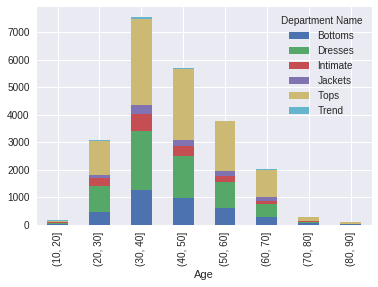

In [98]:
plt.figure(figsize=(15,15))
data.groupby(['Department Name', pd.cut(data['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

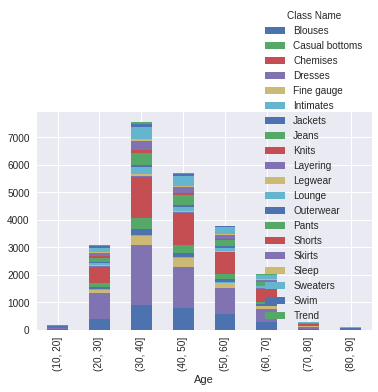

In [99]:
plt.figure(figsize=(15,15))
data.groupby(['Class Name', pd.cut(data['Age'], np.arange(0,100,10))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

## 35 to 39 years of people are most likely to review product.
## Age Group 30 to 40 wrote more positive review

## Based of Age group and mostly bought product with positive reviews we can recommand those products to new customers

In [64]:
data['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', 'Chemises'], dtype=object)

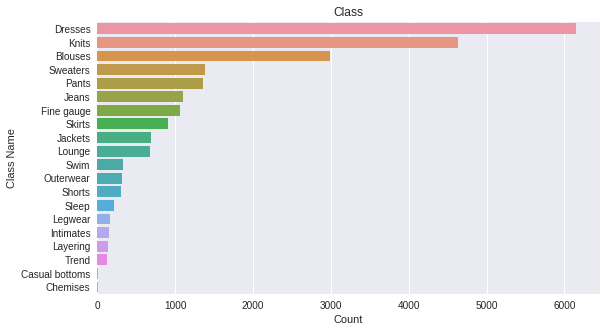

In [65]:
plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=data,order=data["Class Name"].value_counts().index)
plt.title("Class")
plt.xlabel("Count")
plt.show()

People are buying Blouses, Knits and Dresses more

## -   extract topic or concept based features from reviews 

In [90]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

#doc_clean = [clean(doc).split() for doc in doc_complete]  
cleaned_review = data['Review Text'].apply(clean)

In [91]:
cleaned_review = [review.split() for review in cleaned_review] 

In [94]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(cleaned_review)

doc_term_matrix = [dictionary.doc2bow(review) for review in cleaned_review]

In [100]:
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=3)

In [101]:
print(ldamodel.print_topics(num_topics=3, num_words=10))

[(0, '0.040*"size" + 0.023*"dress" + 0.016*"fit" + 0.010*"store" + 0.008*"im" + 0.008*"it" + 0.008*"one" + 0.008*"small" + 0.008*"retailer" + 0.008*"tried"'), (1, '0.025*"love" + 0.023*"it" + 0.017*"color" + 0.017*"great" + 0.014*"wear" + 0.012*"top" + 0.011*"fit" + 0.011*"sweater" + 0.011*"look" + 0.010*"soft"'), (2, '0.019*"dress" + 0.015*"fit" + 0.015*"like" + 0.015*"it" + 0.015*"top" + 0.013*"look" + 0.013*"im" + 0.011*"small" + 0.010*"would" + 0.010*"fabric"')]


## Output of this lda model will give topics and words fall under each topic, by plotting scree plot for each number of topic and overlapping words we can define number of topics.

We can finetune this model by changing num_topics and passes.